___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Категорийные (категориальные) графики - распределение по категориям

Ранее мы посмотрели, как вычислять различные метрики (среднее значение, количество и т.д.) для категорий, и сравнивать их друг с другом. Теперь давайте визуализируем распределение внутри категорий. Мы уже видели, как с помощью distplot() можно посмотреть распределение одной переменной. А теперь давайте посмотрим такое же распределение в разбиении по категориям.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Boxplot

Как мы рассказали в видео-лекции, boxplot отображает распределение, используя квартили, а также и межквартильный размах (IQR - interquartile range) для значений-выбросов (outliers).

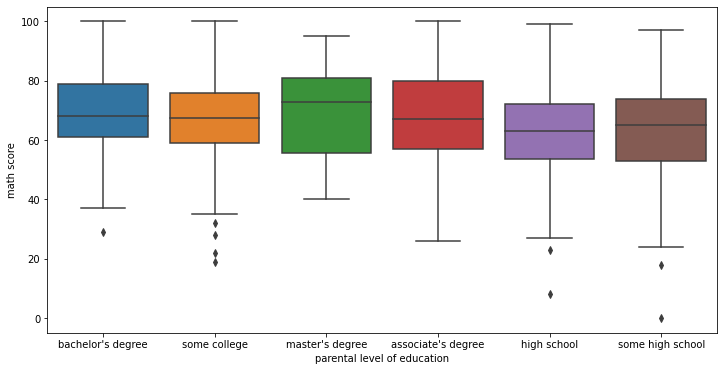

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df);

### Добавляем hue для дальнейшей сегментации

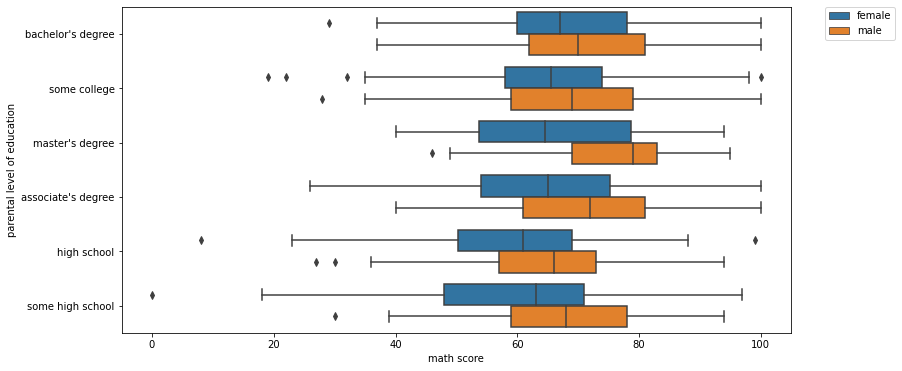

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(y='parental level of education',x='math score',data=df,hue='gender')

# Опционально - перемещаем легенду, чтобы она располагалась вне графика
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Параметры стилизации Boxplot 

#### Ориентация

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

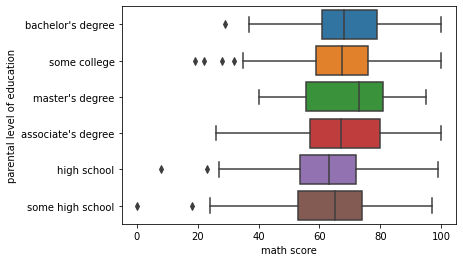

In [7]:
# ОБРАТИТЕ ВНИМАНИЕ, ЧТО МЫ ПОМЕНЯЛИ МЕСТАМИ X И Y В ЭТОМ СЛУЧАЕ!
sns.boxplot(x='math score',y='parental level of education',data=df,orient='h')

#### Ширина - Width

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

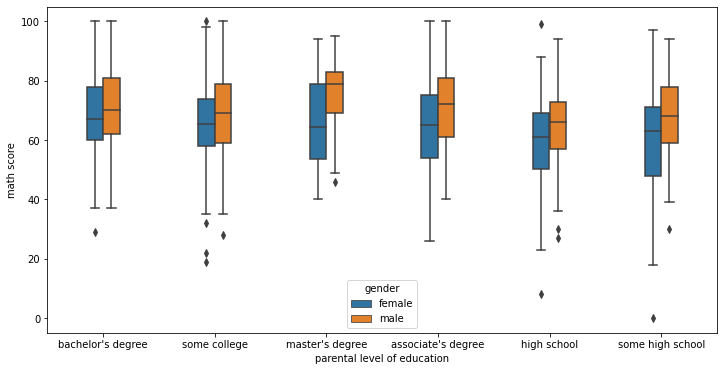

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue='gender',width=0.3)

## Violinplot

График "violin plot" играет ту же роль, что и график box plot. Он показывает распределение количественных данных по уровням одной (или нескольких) категориальной переменной - таким образом, чтобы эти распределения можно было сравнивать друг с другом. В отличие от графика box plot, в котором все компоненты графика соответствуют точкам данных, график violin plot отображает ядерную оценку плотности KDE (kernel density estimation) соответствующего распределения.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

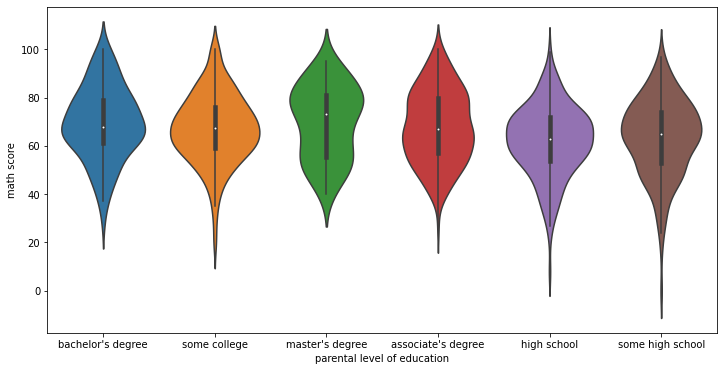

In [9]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

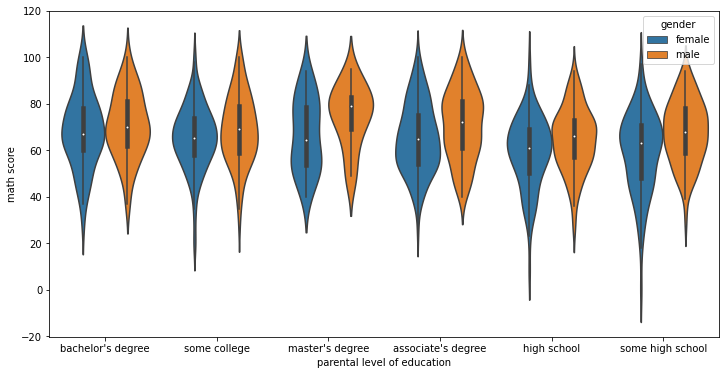

In [10]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,hue='gender')

### Параметры Violinplot

#### split
Если мы в качестве hue указываем переменную, которая принимает только два значения, то можно с помощью split=True нарисовать половинки графика для каждого из этих двух значений. Так можно легче сравнивать распределения.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

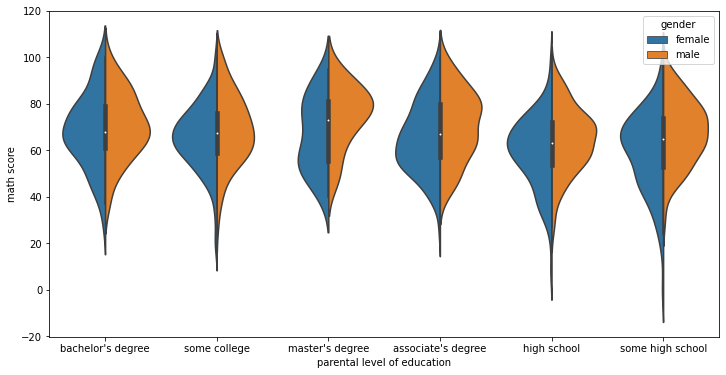

In [11]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,hue='gender',split=True)

#### Параметр inner

Позволяет по-разному изображать точки внутри фигуры. 
- box - рисует миниатюрный boxplot
- quartiles - рисует квартили распределения
- point или stick - рисует каждую отдельную точку
- None - не рисует внутреннюю часть

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

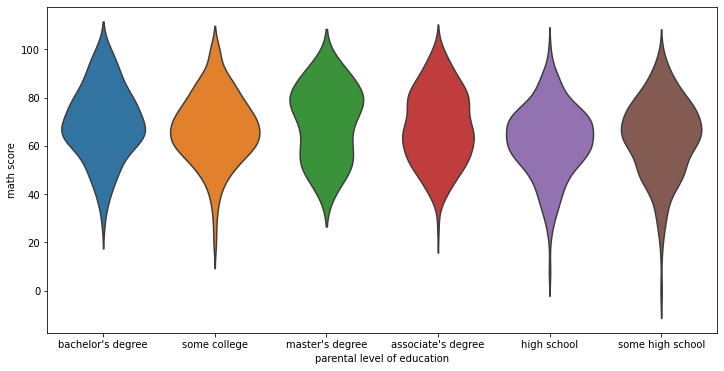

In [12]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner=None)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

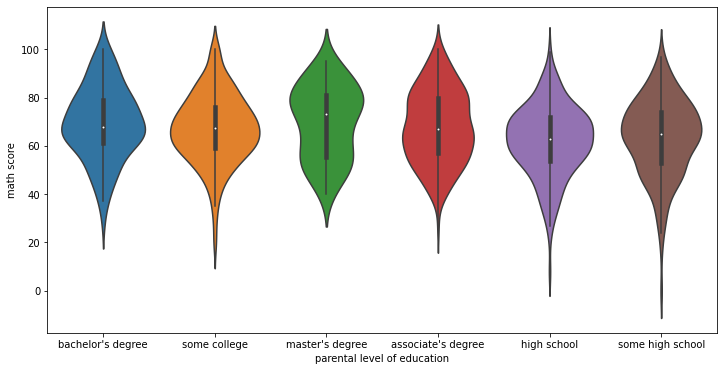

In [13]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='box')

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

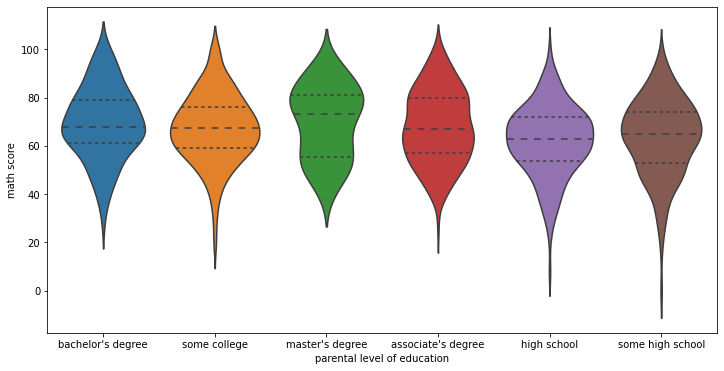

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='quartile')

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

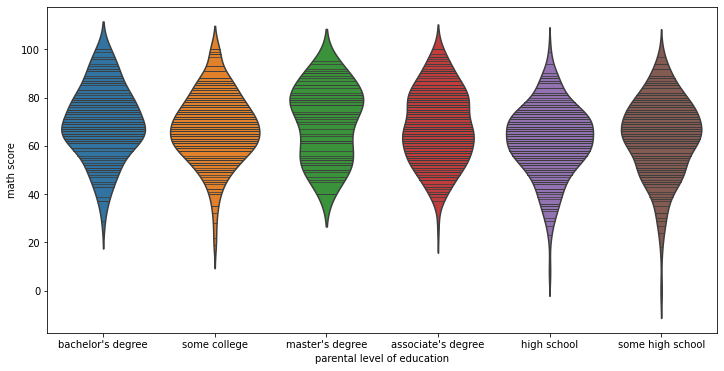

In [15]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='stick')

#### Ориентация

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

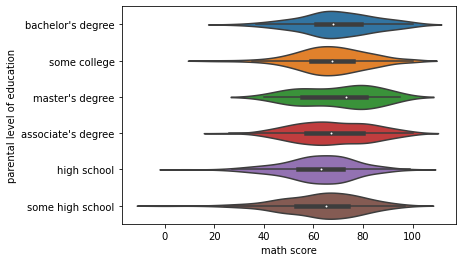

In [15]:
# Просто поменяйте местами переменные - сделайте непрерывную переменную y и категориальную переменную x
sns.violinplot(x='math score',y='parental level of education',data=df,)

#### Параметр bandwidth (bw)

Аналогичен параметру bandwidth для kdeplot

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

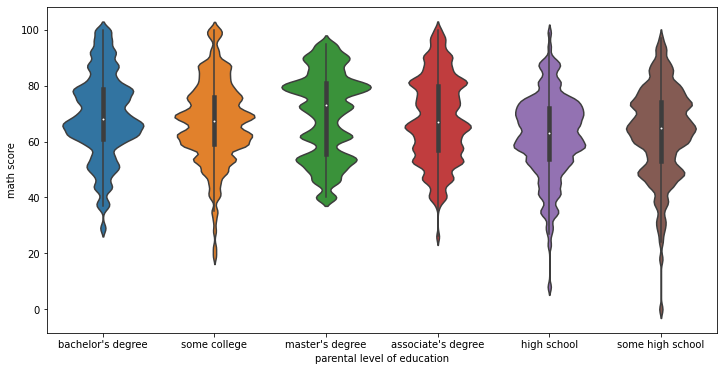

In [16]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,bw=0.1)

# Продвинутые графики

С помощью boxenplot и swarmplot можно достигнуть таких же результатов, что и с помощью boxplot и violinplot, но ещё добавить дополнительную информацию. Однако будьте осторожны с этими графиками - они могут потребовать от Вас объяснений для тех людей, кто будет смотреть их. Используйте их только в случае, если Вы уверены, что аудитория поймёт эти графики.

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## swarmplot

D:\AnacondaPython\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

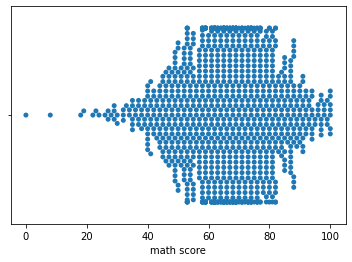

In [16]:
sns.swarmplot(x='math score',data=df)

<AxesSubplot:xlabel='math score'>

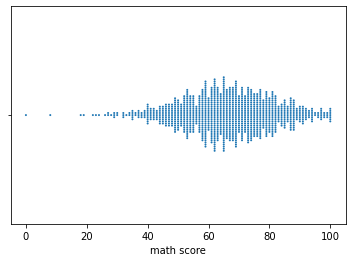

In [17]:
sns.swarmplot(x='math score',data=df,size=2)

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

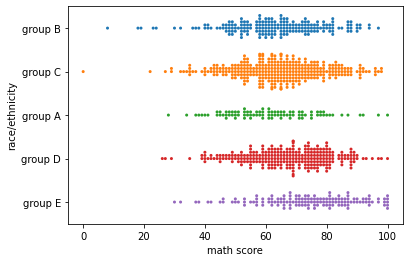

In [18]:
sns.swarmplot(x='math score',y='race/ethnicity',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

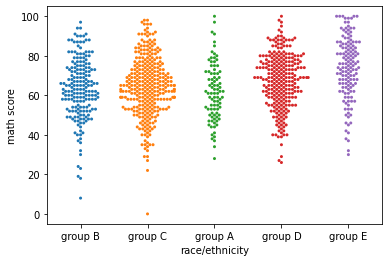

In [31]:
sns.swarmplot(x='race/ethnicity',y='math score',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

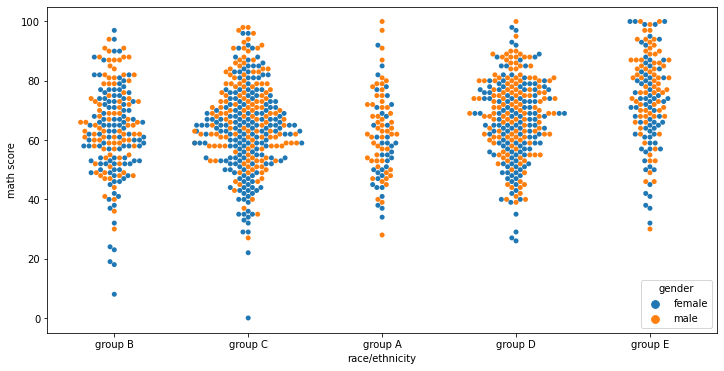

In [19]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender')

D:\AnacondaPython\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

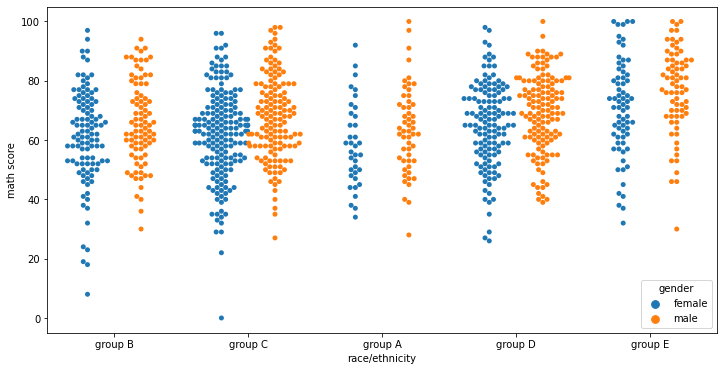

In [20]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender',dodge=True)

### boxenplot (letter-value plot)

Официальное описание этого графика: https://vita.had.co.nz/papers/letter-value-plot.html

Этот стиль графика изначально назывался “letter value” - порядковые статистики, потому что он показывает бОльшее количество квантилей. Такие графики похожи на box plot - они рисуют непараметрическое представление распределения, в котором все значения соответствуют фактическим наблюдениям. Добавляя всё больше и больше квантилей, график позволяет увидеть форму распределения, особенно в "хвостах" диапазонов.

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

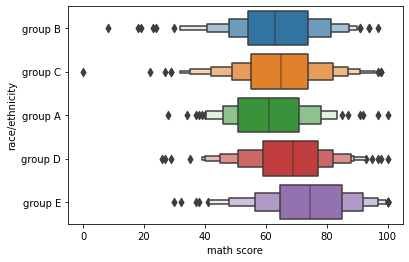

In [21]:
sns.boxenplot(x='math score',y='race/ethnicity',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

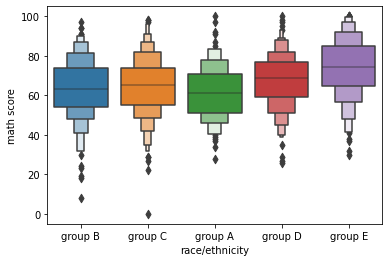

In [22]:
sns.boxenplot(x='race/ethnicity',y='math score',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

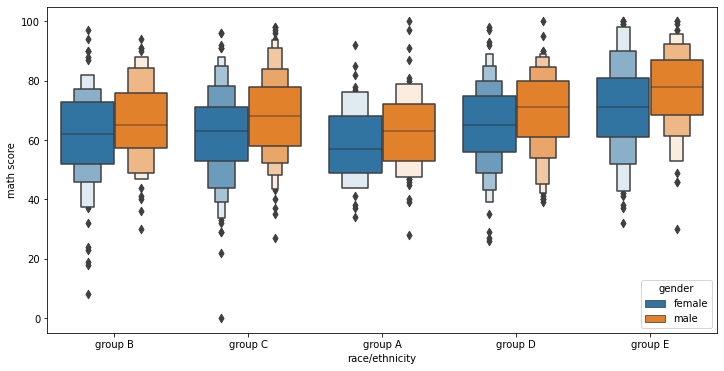

In [23]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='race/ethnicity',y='math score',data=df,hue='gender')

----
----